In [2]:
import itk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r0 = 30
tend = 30
L = 12 * r0
np_img = np.zeros((tend, r0*2 + 10, r0*2 + 10, L + 10), dtype=np.uint8)
indices = np.indices(np_img.shape)
np_img[(np.linalg.norm(indices[1:3] - (5 + r0), axis=0) < r0) & (5 < indices[3]) & (indices[3] < 5+L)] = 5
deltay1 = r0 * (0.35 + 0.25 * np.cos(np.pi * indices[0] / tend))
deltay2 = r0 * (0.75 + 0.25 * np.cos(np.pi * indices[0] / tend))
np_img[(5 + L * 0.475 <= indices[3]) & (indices[3] < 5 + L * 0.525) & (deltay1 < np.abs(5 + r0 - indices[2]))] = 0
np_img[(5 + L * 0.45 <= indices[3]) & (indices[3] < 5 + L * 0.55) & (deltay2 < np.abs(5 + r0 - indices[2]))] = 0
for x0 in [5 + L * 0.475, 5 + L * 0.525]:
    for y in [5 + r0 + deltay2, 5 + r0 - deltay2]:
        centers = np.full((2, *np_img.shape), x0)
        centers[0] = y
        deltas = indices[2:] - centers
        scaled_deltas = (deltas.T / np.array([0.4, 0.3])).T
        rs = np.linalg.norm(scaled_deltas, axis = 0)
        np_img[rs < r0] = 0
np_img[(indices[3] < 10) & (indices[3] > 1) & (np_img != 0)] = 1 # inlet
np_img[(indices[3] > L) & (indices[3] < L + 9) & (np_img != 0)] = 2 # outlet
np_img[(indices[3] >= 5 + L * 0.4) & (indices[3] < L * 0.6 + 5) & (indices[2] > 6 + r0) & (deltay2 > indices[2] - 5 - r0) & (np_img != 0)] = 3 # moving top
np_img[(indices[3] >= 5 + L * 0.4) & (indices[3] < L * 0.6 + 5) & (indices[2] <= 4 + r0) & (deltay2 > 5 + r0 - indices[2]) & (np_img != 0)] = 4 # moving bottom
np_img[(np.linalg.norm(indices[1:3] - (5 + r0), axis=0) > r0 - 2) & (7 < indices[3]) & (indices[3] < 3+L) & (np_img != 0)] = 5 # wall
np_img[(indices[0] == 29) & (np_img != 0)] = 6 # future

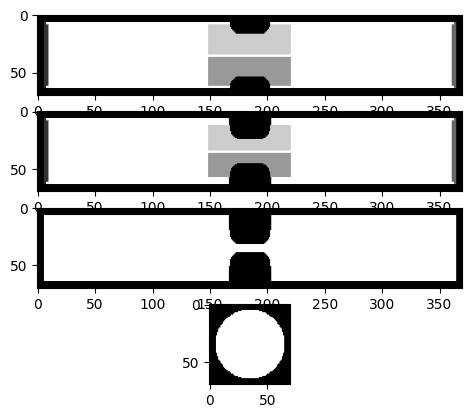

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
ax1.imshow(np_img[0, 25, :, :], cmap='gray')
ax2.imshow(np_img[15, 25, :, :], cmap='gray')
ax3.imshow(np_img[29, 25, :, :], cmap='gray')
ax4.imshow(np_img[11, :, :, 22], cmap='gray')

In [5]:
padded = np.pad(np_img, ((5, 5), (0, 0), (0, 0), (0, 0)))
image = itk.image_from_array(padded)
image.SetSpacing([1, 1, 1, 2])
image.GetLargestPossibleRegion().GetSize(), image.GetSpacing()

(itkSize4 ([370, 70, 70, 40]), itkVectorD4 ([1, 1, 1, 2]))

In [7]:
(np_img != 0).sum(), np_img.shape

(28689178, (30, 70, 70, 370))

In [24]:
itk.imwrite(image, 'data/artery.mha')